In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Логистическая регрессия

## Классификация с помощью линейной регрессии

In [2]:
cancer = load_iris()

In [3]:
data = cancer.data
fn = cancer.feature_names

In [4]:
scaler = StandardScaler()

In [5]:
tsne = TSNE(n_components=2)

In [6]:
tsne_data = tsne.fit_transform(scaler.fit_transform(data))

<p>В некоторых задачах классификации, мы бы хотели разделить классы с помощью линейной плоскости, поскольку данные хорошо подходят для этого алгоритма</p>

In [7]:
lr = LinearRegression()

In [8]:
cancer.target[cancer.target != 0] = -1
cancer.target[cancer.target == 0] = 1

In [9]:
plt.style.use('seaborn')

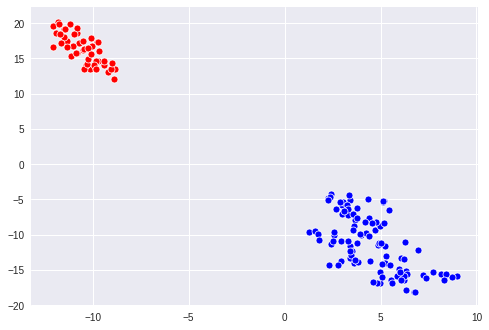

In [10]:
sns.scatterplot(tsne_data[cancer.target == -1, 0], tsne_data[cancer.target == -1, 1], color='b');
sns.scatterplot(tsne_data[cancer.target == 1, 0], tsne_data[cancer.target == 1, 1], color='r');

In [11]:
lr.fit(tsne_data, cancer.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
lr.coef_

array([-0.09957644,  0.0150349 ], dtype=float32)

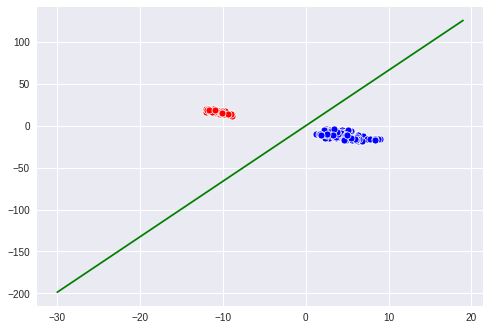

In [13]:
sns.scatterplot(tsne_data[cancer.target == -1, 0], tsne_data[cancer.target == -1, 1], color='b');
sns.scatterplot(tsne_data[cancer.target == 1, 0], tsne_data[cancer.target == 1, 1], color='r');
plt.plot(np.arange(-30, 20), -np.arange(-30, 20)*lr.coef_[0]/lr.coef_[1], c='g');

<p>Это возможно если мы дадим метки классам {-1;1} и будем тренировать алгоритм как обычно, в этом случае точки ниже линии будут отрицательного класса, а выше положительного.</p>
<p>Однако это не является лучшим выбором поскольку мы не можем сказать с какой уверенностью алгоритм дает ответ пренадлежности к тому или иному классу</p>

## Отступ

<p>В качестве меры уверенности, логичным решением является использование расстояние от точки до разделяющей прямой, данное расстояние называется отступом и обозначается M(x)</p>
<p>Кроме того у отступа имеется знак и он положителен если текущая точка находится на стороне своего класса и отрицателен если наоборот</p>
<p><center>$$\large{M(x_i) = [y_i == y_c]<x_iw>}$$</center></p>
<img src="./img/margin.png">
<p>Отступ показывает уверенность нашего предсказания, однако мы бы хотели опрерировать вероятностями пренадлежности класса, для этого нам необходима функция которая бы переводила значение из отрезка ($-\infty;+\infty$) в отрезок (0; 1). Так же желательно чтобы данная функция была дифференцируема, одним из лучших выборов для данных ограниченией является сигмоид функция</p>
<p><center>$$\large{\sigma = \frac{1}{1+\exp^{(-M(x))}}}$$</center></p>
<p>Так же важно что производная сигмоид функции, очень близка к нормальному распределению</p>

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

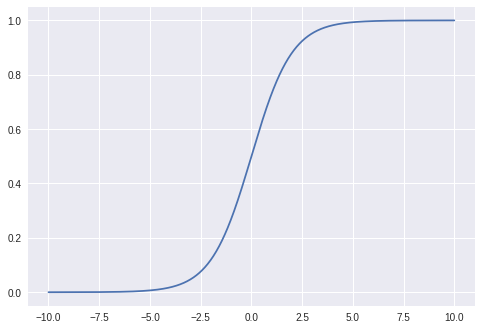

In [15]:
plt.plot(np.linspace(-10, 10, 1000), [sigmoid(var) for var in np.linspace(-10, 10, 1000)]);

In [16]:
def sigmoid_deveriate(x):
    return sigmoid(x)*(1-sigmoid(x))

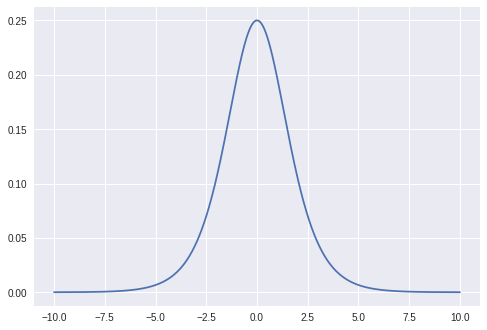

In [17]:
plt.plot(np.linspace(-10, 10, 1000), [sigmoid_deveriate(var) for var in np.linspace(-10, 10, 1000)]);

<p>Еще одним условием для построения хорошей модели линейного разделения классов, это изменение функции оптимизация с квадратичной ошибки на что-то другое</p>
<p>Наилучшим способом является оптимизации функции правдоподобия, данная функция показывает насколько ответы алгоритма правдоподобны данным</p>
<p><center>$$\large{L=\prod_{i=1}^{N}p(y_i|\sigma_i)}$$</center></p>

- $p(y_i|\sigma_i) = \sigma$ для положительного класса 
- $p(y_i|\sigma_i) = 1 - \sigma$ для отрицательного класса

<p>Недостатоком этой функции, является сложное дифференцирование, из-за произведения внутри нее, однако данная проблема легко обходится взятием логарифма, которые преобразует произведение в сумму</p>
<p><center>$$\large{L=\sum_{i=1}^{N}[y\log(\sigma)+(1-y)\log(1-\sigma)]}$$</center></p>
<p>Модель минимизирующая отступ, путем минимизации отрицательной функции логарифмического правдопобия называется логистической регрессией</p>
<p>Данная модель представленна классом LogisticRegression, в библиотеке sklearn модуля liner_models</p>
<p>Параметры модели:</p>

- penalty - регуляризация модели (l1, l2, elasticnet)
- C - сила регуляризации

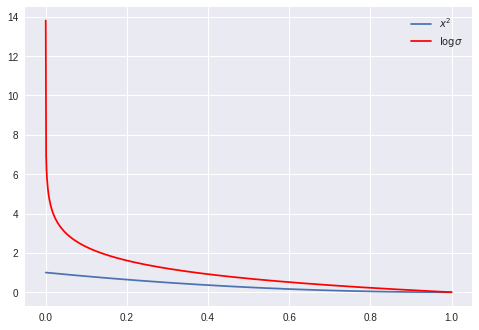

In [18]:
plt.plot(np.linspace(1e-6, 1, 1000), (1 - np.linspace(1e-6, 1, 1000))**2, label='$x^2$');
plt.plot(np.linspace(1e-6, 1, 1000), -np.log(np.linspace(1e-6, 1, 1000)), label='$\log{\sigma}$', c='r');
plt.legend();

In [19]:
lr = LogisticRegression()

In [20]:
lr.fit(tsne_data, cancer.target)

/home/akvelon/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
tsne_data[cancer.target == -1,0]

array([3.6108067, 2.9496188, 3.843502 , 3.4060967, 3.399221 , 3.6810112,
       2.7577682, 2.2491667, 3.4903724, 3.7648153, 2.414971 , 4.71534  ,
       4.35034  , 3.9935195, 4.3741536, 3.394149 , 4.9978123, 3.013062 ,
       5.162952 , 3.008197 , 5.222561 , 3.6101484, 5.4387174, 3.5689998,
       3.7641366, 3.468824 , 3.4296534, 4.4562383, 4.2176485, 2.6754198,
       3.0249863, 2.8830469, 3.2868695, 2.562898 , 5.1922665, 2.3241582,
       3.6555352, 5.1191773, 4.739273 , 3.2273352, 3.2945995, 4.3907723,
       3.101491 , 2.3504481, 3.5639117, 4.5778103, 4.209054 , 3.9311311,
       2.2503283, 3.7716064, 4.959467 , 1.7227349, 7.236026 , 5.2814865,
       5.938301 , 8.330356 , 3.3720167, 8.146946 , 6.97393  , 6.3296585,
       4.9814587, 2.424908 , 6.314658 , 1.2514   , 6.3015   , 5.080456 ,
       5.213059 , 6.765402 , 9.010218 , 5.1428447, 6.2320814, 1.5960922,
       8.717791 , 2.5355973, 5.5706882, 7.357493 , 2.9473684, 4.8739543,
       6.072944 , 7.750434 , 8.397276 , 6.821625 , 

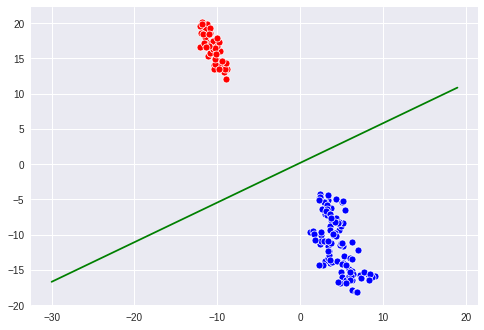

In [22]:
sns.scatterplot(tsne_data[cancer.target == -1, 0], tsne_data[cancer.target == -1, 1], color='b');
sns.scatterplot(tsne_data[cancer.target == 1, 0], tsne_data[cancer.target == 1, 1], color='r');
plt.plot(np.arange(-30, 20), (-np.arange(-30, 20)*lr.coef_[0, 0] - lr.intercept_)/lr.coef_[0, 1], c='g');